# Exercícios de Fixacão 1 - Aula II - Otimização

    Matéria: ENGA74 - Inteligência Computacional

    Alunos: Ricardo Augusto de Araújo Machado, Ricardo Goncalves Pinto

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams.update({"axes.grid": True})

## Questão 1

### 1 a) Determine a função que descreve a área da superfície.

<img src="figura1.svg" alt="Figura 1" style="width:500px; margin:auto;" />

A área da superfície é dada pela área do retângulo menos a área do oríficio.

$ S = a\cdot b - \frac{\pi d^2}{4} $

Pela restrição dada a dimensão do retângulo, $ a + b = 10 $, é possível então reduzir o problema para uma única variável independente:

$ b = 10 - a  \quad \quad \text{e} \quad \quad d = \frac{a}{2} $

Logo:

$ S =  a\cdot (10 - a) - \frac{\pi a^2}{16}$

In [8]:
a = np.arange(0, 10, 0.01)
area = a * (10 - a) - np.pi * a**2 / 16

### 1 b) Plote o gráfico da função.

Text(0, 0.5, 'Área (m^2)')

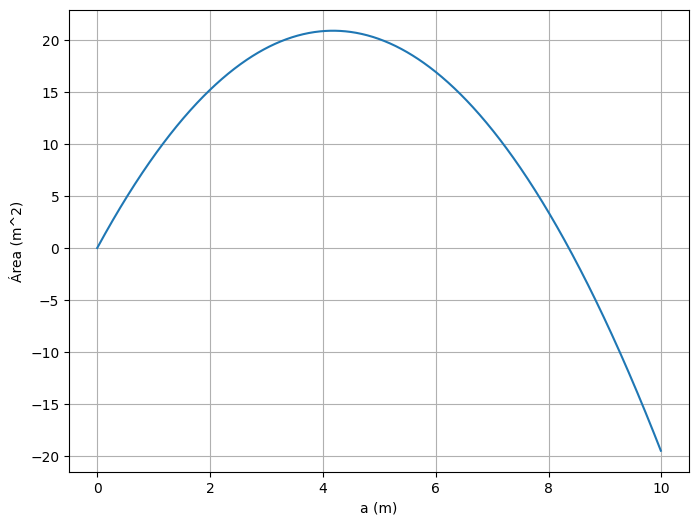

In [9]:
sns.lineplot(x=a, y=area)
plt.xlabel("a (m)")
plt.ylabel("Área (m^2)")

Figura 1: Gráfico da área da superfície em função do comprimento 'a'.

### 1 c) Escreva um algoritmo de otimização tipo gradiente descendente para encontrar a área máxima e plotar o valor da função otimizada a cada iteração.

Pelo gráfico, percebe-se que o ponto máximo da função está entre a = 3 m e a = 5 m. Portanto, adota-se como estimativa inicial: a = 4 m.

In [ ]:
estimativa_inicial = 4


def derivada_area_negativa(a):

    # Pois o gradiente descendente encontra pontos de mínimo.
    # Então, para encontrar o máximo, deve-se inverter o sinal da derivada.

    return -10 + 2 * a + np.pi * a / 8

É utilizada a derivada da função área multiplicada por -1. Isso ocorre pois o algoritmo de gradiente descente localiza apenas pontos de mínimos e o ponto crítico procurado é um máximo da função área.

In [11]:
def gradiente_descendente_area(valor_inicial, num_iteracoes, alfa):
    """
    Entradas: valor_inicial, num_iteracoes, alfa
    Saida: valores_final
    """
    valor_iteracoes = np.zeros(num_iteracoes)
    valor_atual = valor_inicial
    for i in range(0, num_iteracoes):
        derivada_atual = derivada_area_negativa(valor_atual)
        valor_atual = valor_atual - alfa * derivada_atual
        valor_iteracoes[i] = valor_atual

    return valor_iteracoes

Inicialmente, o algoritmo é executado com os seguintes parâmetros
25 iterações, $x_o = 4$ e $ \alpha = 0.1 $

In [12]:
num_iteracoes = 25
a_max_por_iteracao = gradiente_descendente_area(estimativa_inicial, num_iteracoes, 0.1)

Text(0, 0.5, "Valor de 'a' que maximiza a área. (m)")

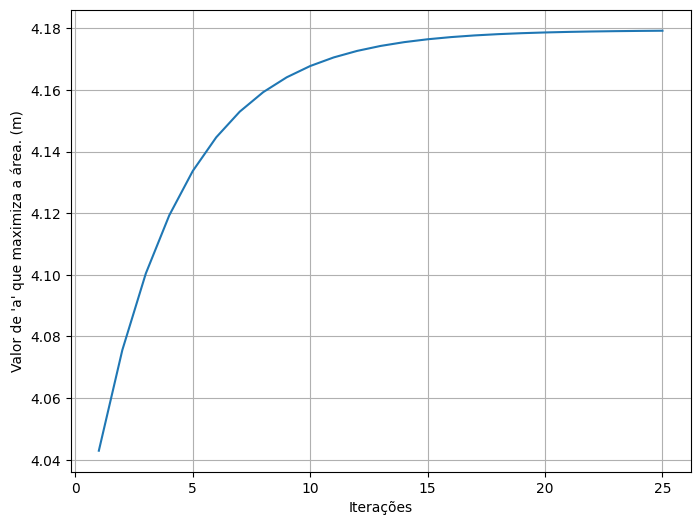

In [13]:
sns.lineplot(x=np.arange(1, num_iteracoes + 1), y=a_max_por_iteracao)
plt.xlabel("Iterações")
plt.ylabel("Valor de 'a' que maximiza a área. (m)")

Figura 2: Gráfico do valor de a que maximiza a área em função do número de iterações do algoritmo gradiente descendente.

In [14]:
def determinar_area(a):
    return a * (10 - a) - np.pi * a**2 / 16

In [15]:
area_maxima_por_iteracao = determinar_area(a_max_por_iteracao)

Text(0, 0.5, 'Valor da área máxima. (m^2)')

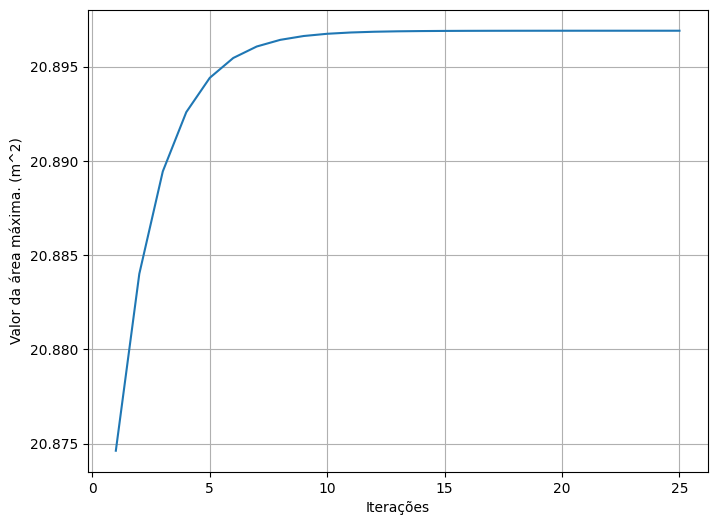

In [16]:
sns.lineplot(x=np.arange(1, num_iteracoes + 1), y=area_maxima_por_iteracao)
plt.xlabel("Iterações")
plt.ylabel("Valor da área máxima. (m^2)")

Figura 3: Gráfico da área máxima obtida em função do número de iterações do algoritmo gradiente descendente.

In [17]:
area_maxima_por_iteracao[-1]

np.float64(20.89690269717274)

A área máxima encontrada pelo algoritmo do gradiente descendente é de $20.8969 m^2$

### 1 d) Execute novamente o algoritmo de otimização variando os valores atribuídos para $\alpha$ e $x_0$. Compare e comente os resultados obtidos.

##### Análise da variação da área máxima com a variação do alfa.


In [18]:
alfa = np.arange(1, 8, 2) * 0.1
a_max_vetor_alfa = []
for i, valor in enumerate(alfa):
    a_max_vetor_alfa.append(
        gradiente_descendente_area(estimativa_inicial, num_iteracoes, valor)
    )

In [19]:
area_max_vetor_alfa = []
for i, a_i in enumerate(a_max_vetor_alfa):
    area_max_vetor_alfa.append(determinar_area(a_i))

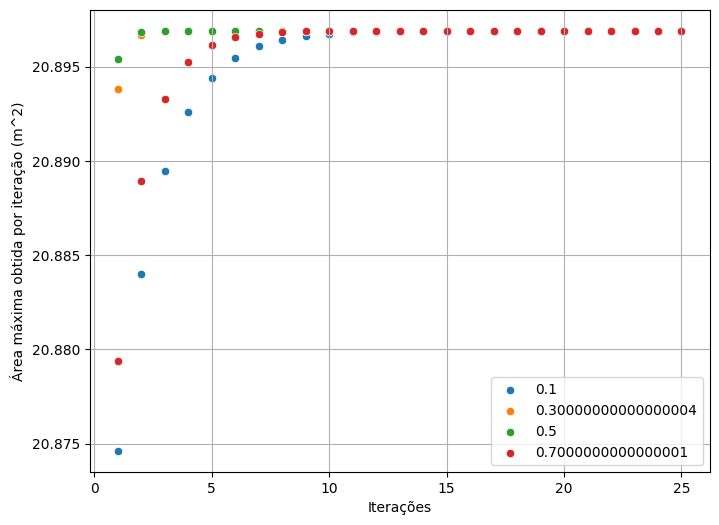

In [20]:
for i, alfa_i in enumerate(alfa):
    sns.scatterplot(x=np.arange(1, num_iteracoes + 1), y=area_max_vetor_alfa[i])
    plt.xlabel("Iterações")
    plt.ylabel("Área máxima obtida por iteração (m^2)")
    plt.legend(alfa)
    plt.grid()

Figura 4: Variação da área máxima com diferentes valores de $\alpha$.

Para $\alpha$ entre 0,1 e 0,7, o algoritmo de gradiente descente é convergente e apresenta melhor desempenho para $\alpha = 0.5$.

Text(0.5, 1.0, 'Valor da área máxima com alfa = 0.9')

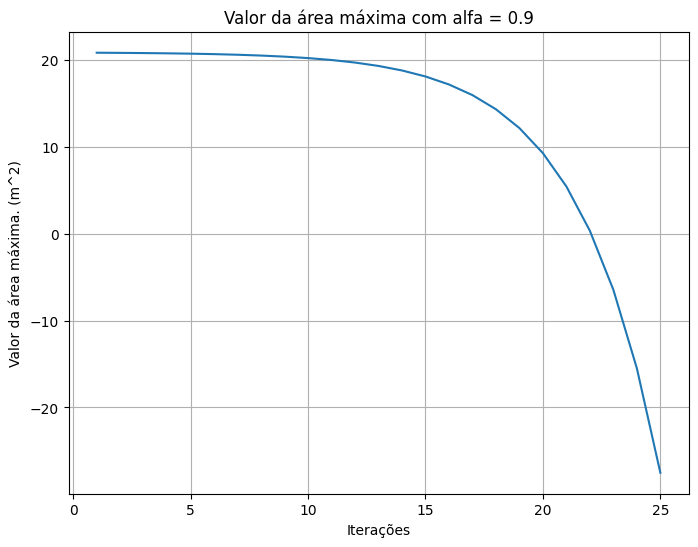

In [21]:
a_max_por_iteracao_alfa_09 = gradiente_descendente_area(
    estimativa_inicial, num_iteracoes, 0.9
)
area_maxima_por_iteracao_alfa_09 = determinar_area(a_max_por_iteracao_alfa_09)
sns.lineplot(x=np.arange(1, num_iteracoes + 1), y=area_maxima_por_iteracao_alfa_09)
plt.xlabel("Iterações")
plt.ylabel("Valor da área máxima. (m^2)")
plt.title("Valor da área máxima com alfa = 0.9")

Figura 5: Variação da área máxima para $\alpha = 0,9$. Nesse caso específico, o algoritmo não converge para a solução final.

#### Análise da variação da área máxima com a variação do $x_o$.


In [22]:
estimativa_inicial = np.arange(0, 11, 2)
a_max_vetor_x0 = []
for i, valor in enumerate(estimativa_inicial):
    a_max_vetor_x0.append(gradiente_descendente_area(valor, num_iteracoes, 0.1))

In [23]:
area_max_vetor_x0 = []
for i, a_i in enumerate(a_max_vetor_x0):
    area_max_vetor_x0.append(determinar_area(a_i))

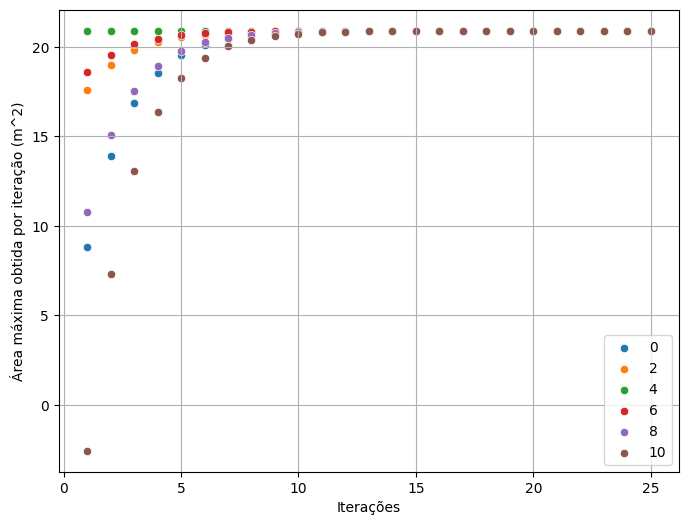

In [ ]:
for i, alfa_i in enumerate(estimativa_inicial):
    sns.scatterplot(x=np.arange(1, num_iteracoes + 1), y=area_max_vetor_x0[i])

    plt.xlabel("Iterações")

    plt.ylabel("Área máxima obtida por iteração (m^2)")

    plt.legend(estimativa_inicial)

    plt.grid()

Figura 6: Variação da área máxima com diferentes valores de $x_0$.

O algoritmo converge para valores de $x_0$ entre 0 e 10. A convergência mais rápida acontece para o valor obtido pela análise gráfica $x_0 = 4$.

## Questão 2

### 2 a) Plote o gráfico 3D e o gráfico de contorno (visualização 2D) no intervalo $-10 < x_1 < 10$, $-10 < x_2 < 10$.

In [25]:
def f(x, y):
    return x**2 + y**2 - 25

In [26]:
x1 = np.arange(-10, 10, 0.01)
x2 = x1
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

#### Gráfico 3D da função $f(x_1,x_2)$

Text(0.5, 0, 'f(x1, x2)')

<Figure size 800x600 with 0 Axes>

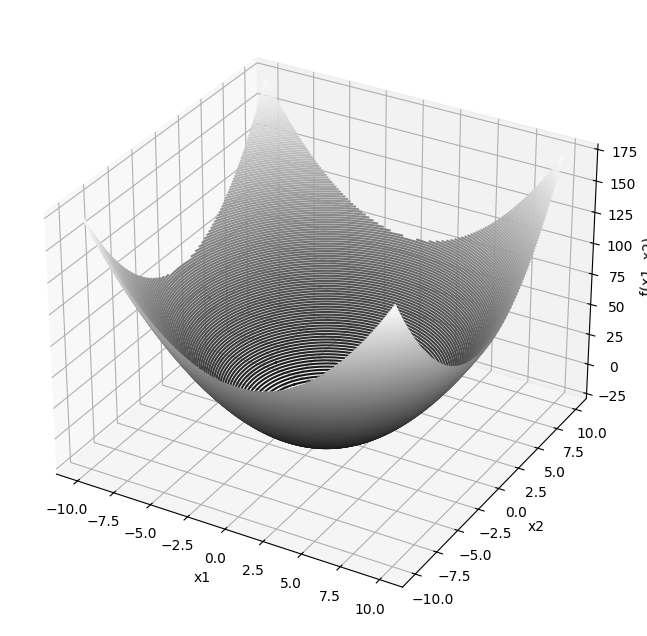

In [27]:
plt.figure(2)
fig = plt.figure(figsize=(12, 8))  # Aumentar o tamanho do plot
ax = plt.axes(projection="3d")
ax.contour3D(X1, X2, Z, 150, cmap="gray")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1, x2)")

Figura 7: Representação 3D da função $f(x_1,x_2)$.

#### Gráfico de contorno da função $f(x_1,x_2)$

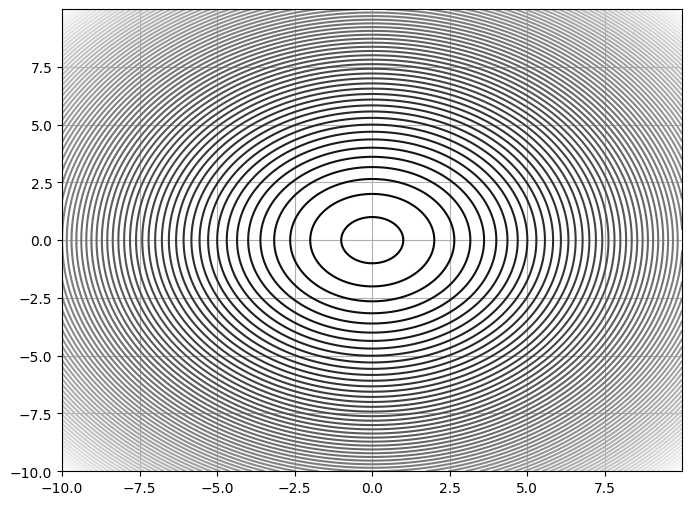

In [28]:
plt.contour(X1, X2, Z, 75, cmap="gray")

Figura 8: Gráfico de contorno 2D da função $f(x_1,x_2)$.

### 2 b) Execute o algoritmo do gradiente descendente para encontrar o ponto de mínimo de $f(x_1, x_2)$, plotando as soluções candidatas a cada 5 iterações nos gráficos criados no item a. Utilize $\alpha = 0,005$ e $x_0 = [8, 8]$. Gere também um gráfico do valor da função a cada iteração do algoritmo.

In [29]:
def grad_f(x, y):
    return np.array([2 * x, 2 * y])


def gradiente_descendente_f(valores_iniciais, num_iteracoes, alfa):
    valores_iteracoes = []
    valores_atuais = valores_iniciais
    for i in range(0, num_iteracoes):
        grad_atual = grad_f(x=valores_atuais[0], y=valores_atuais[1])
        valores_atuais = valores_atuais - alfa * np.transpose(grad_atual)
        valores_iteracoes.append(valores_atuais)

    return valores_iteracoes

In [30]:
num_iteracoes = 700
valores_iniciais = np.array([8, 8])
alfa = 0.005
valores_por_iteracao = gradiente_descendente_f(valores_iniciais, num_iteracoes, alfa)

Text(0.5, 1.0, 'Valores por iteração')

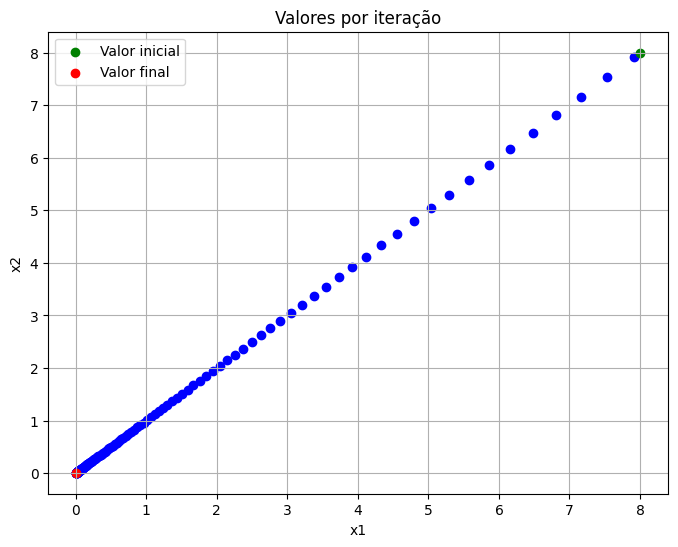

In [31]:
# Pegar os valores por iteração em 5 em 5.
valores_por_iteracao = np.array(valores_por_iteracao)
valores_cada_5_iter = valores_por_iteracao[::5]
valores_cada_5_iter = np.transpose(valores_cada_5_iter)
plt.scatter(valores_cada_5_iter[0], valores_cada_5_iter[1], color="blue")
plt.scatter(
    valores_iniciais[0], valores_iniciais[1], color="green", label="Valor inicial"
)
plt.scatter(
    valores_por_iteracao[-1][0],
    valores_por_iteracao[-1][1],
    color="red",
    label="Valor final",
)
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Valores por iteração")

Figura 9: Representação dos pontos por iteração no espaço da função $f(x_1, x_2)$. Os pontos azuis indicam as soluções candidatas a cada 5 iterações, o ponto verde representa o valor inicial ($x_0$), e o ponto vermelho indica o valor final encontrado pelo algoritmo de gradiente descendente.

Text(0.5, 0, 'f(x1, x2)')

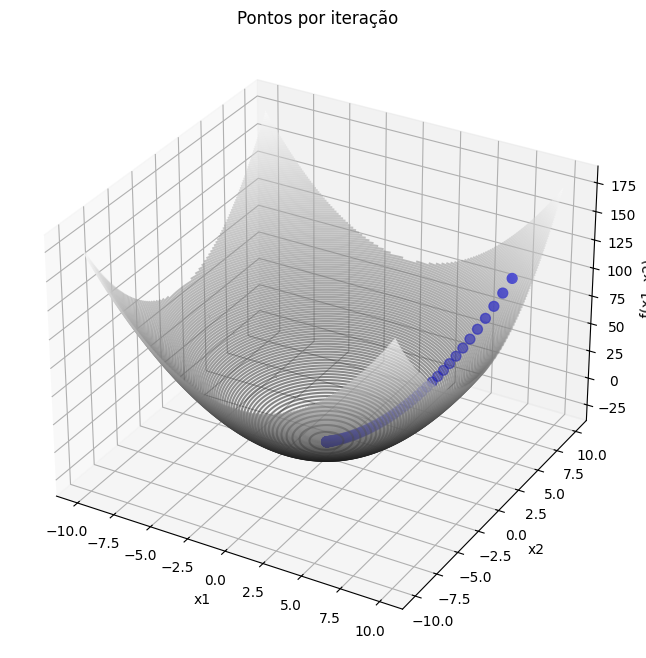

In [32]:
fig = plt.figure(figsize=(12, 8))  # Aumentar o tamanho do plot
ax = fig.add_subplot(111, projection="3d")
# Alterar a ordem de plotagem para que os pontos fiquem na frente da superfície
ax.contour3D(
    X1, X2, Z, 150, cmap="gray", alpha=0.5
)  # Tornar a superfície semitransparente
ax.scatter3D(
    valores_cada_5_iter[0],
    valores_cada_5_iter[1],
    f(valores_cada_5_iter[0], valores_cada_5_iter[1]),
    color="blue",
    s=50,
    label="Iterações (5 em 5)",
)
ax.set_title("Pontos por iteração")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1, x2)")

Figura 10: Representação do valor obtido para a função a cada 5 iterações.

### 2 c) Varie os valores de $\alpha$ e $x_0$, compare e comente os resultados obtidos.

#### Análise da variação do alfa no desempenho do algoritmo.


In [33]:
alfa = np.arange(1, 10, 2) * 0.1
valores_iter_vetor_alfa = []
for i, valor in enumerate(alfa):
    valores_iter_vetor_alfa.append(
        gradiente_descendente_f(valores_iniciais, num_iteracoes, valor)
    )

In [34]:
# Pegar valores por iteração em 5 em 5.
valores_iter_vetor_alfa = [np.array(valores) for valores in valores_iter_vetor_alfa]
valores_iter_vetor_alfa = [valores[::5] for valores in valores_iter_vetor_alfa]
valores_iter_vetor_alfa = [np.transpose(valores) for valores in valores_iter_vetor_alfa]

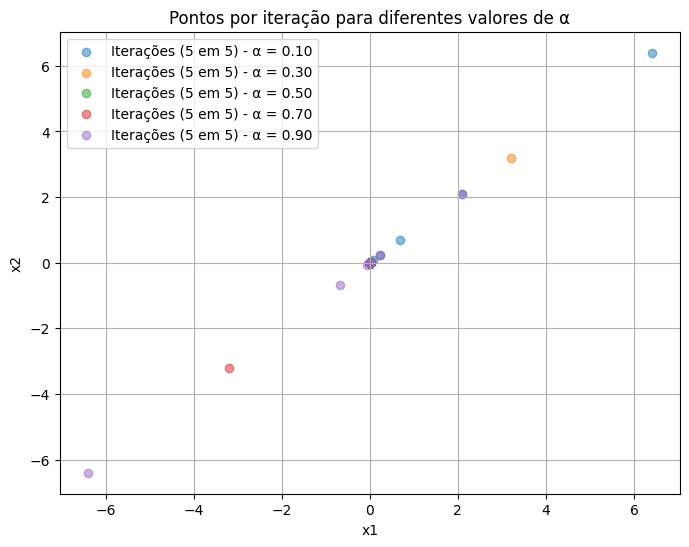

In [35]:
for i, alfa_i in enumerate(alfa):
    plt.scatter(
        valores_iter_vetor_alfa[i][0],
        valores_iter_vetor_alfa[i][1],
        alpha=0.5,
        label=f"Iterações (5 em 5) - α = {alfa_i:.2f}",
    )
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Pontos por iteração para diferentes valores de α")
    plt.legend()

Figura 11: Representação dos pontos por iteração no espaço da função $f(x_1, x_2)$ para diferentes valores de alfa.

Text(0.5, 0, 'f(x1, x2)')

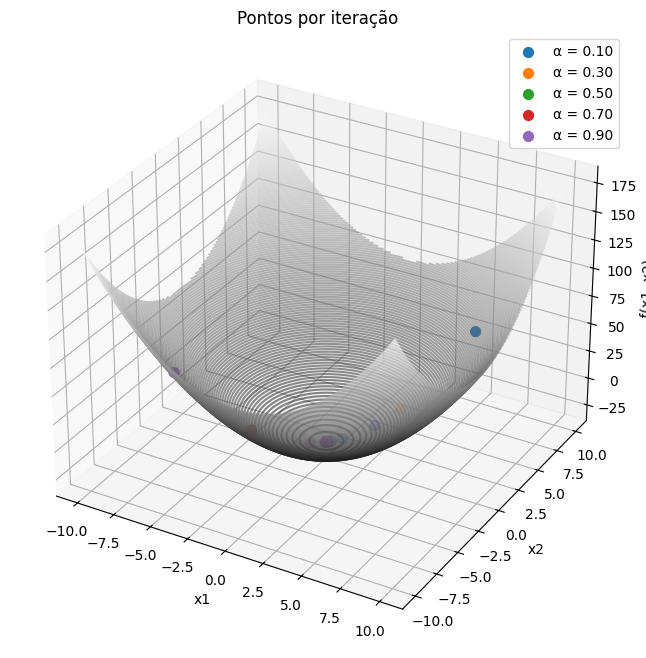

In [36]:
fig = plt.figure(figsize=(12, 8))  # Aumentar o tamanho do plot
ax = fig.add_subplot(111, projection="3d")
ax.contour3D(X1, X2, Z, 150, cmap="gray", alpha=0.5)
for i, alfa_i in enumerate(alfa):
    ax.scatter3D(
        valores_iter_vetor_alfa[i][0],
        valores_iter_vetor_alfa[i][1],
        f(valores_iter_vetor_alfa[i][0], valores_iter_vetor_alfa[i][1]),
        label=f"α = {alfa_i:.2f}",
        s=50,
    )
    ax.legend()
ax.set_title("Pontos por iteração")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1, x2)")

Figura 12: Representação dos valores obtidos variando o parâmetro $\alpha$ para a função a cada 5 iterações.

In [37]:
for i, alfa_i in enumerate(alfa):
    print(f"Valor final para α = {alfa_i:.2f}: {valores_iter_vetor_alfa[i][:, -1]}")

Valor final para α = 0.10: [2.84263392e-67 2.84263392e-67]
Valor final para α = 0.30: [8.64657178e-277 8.64657178e-277]
Valor final para α = 0.50: [0. 0.]
Valor final para α = 0.70: [8.64657178e-277 8.64657178e-277]
Valor final para α = 0.90: [2.84263392e-67 2.84263392e-67]


Text(0.5, 1.0, 'Valores por iteração para α = 0.9')

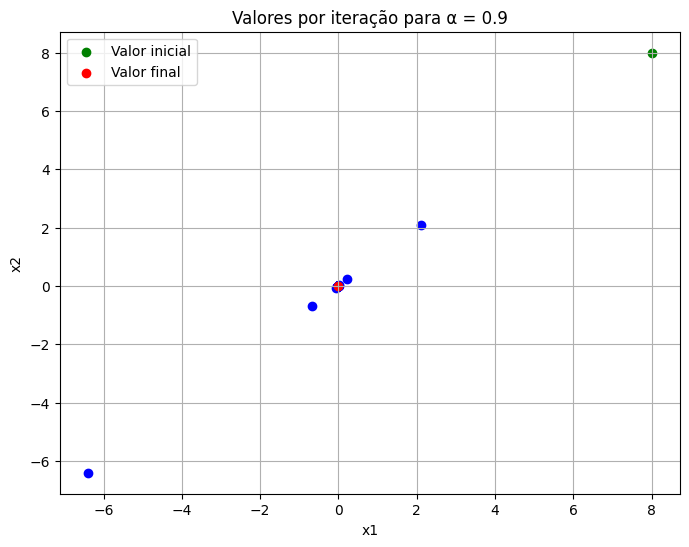

In [38]:
valores_iter = gradiente_descendente_f(valores_iniciais, num_iteracoes, 0.9)
# Pegar os valores por iteração em 5 em 5.
valores_iter = np.array(valores_iter)
valores_iter = valores_iter[::5]
valores_iter = np.transpose(valores_iter)
plt.scatter(valores_iter[0], valores_iter[1], color="blue")
plt.scatter(
    valores_iniciais[0], valores_iniciais[1], color="green", label="Valor inicial"
)
plt.scatter(valores_iter[0][-1], valores_iter[1][-1], color="red", label="Valor final")
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Valores por iteração para α = 0.9")

Figura 13: Representação dos pontos por iteração no espaço da função $f(x_1, x_2)$ para $\alpha = 0,9$.

O algoritmo converge para os valores de $\alpha$ entre 0,1 e 0,9, embora apresente um comportamento oscilatório para $\alpha = 0,9$.

#### Análise da variação de $x_0$ no desempenho do algoritmo.

In [39]:
valores_iniciais_variados = [np.array([x, x]) for x in range(2, 13, 2)]

# Executar o algoritmo de gradiente descendente para cada valor inicial
valores_iter_vetor_x0 = []
for valor_inicial in valores_iniciais_variados:
    valores_iter_vetor_x0.append(
        gradiente_descendente_f(valor_inicial, num_iteracoes, 0.1)
    )

# Pegar os valores por iteração em 5 em 5.
valores_iter_vetor_x0 = [np.array(valores) for valores in valores_iter_vetor_x0]
valores_iter_vetor_x0 = [valores[::5] for valores in valores_iter_vetor_x0]
valores_iter_vetor_x0 = [np.transpose(valores) for valores in valores_iter_vetor_x0]

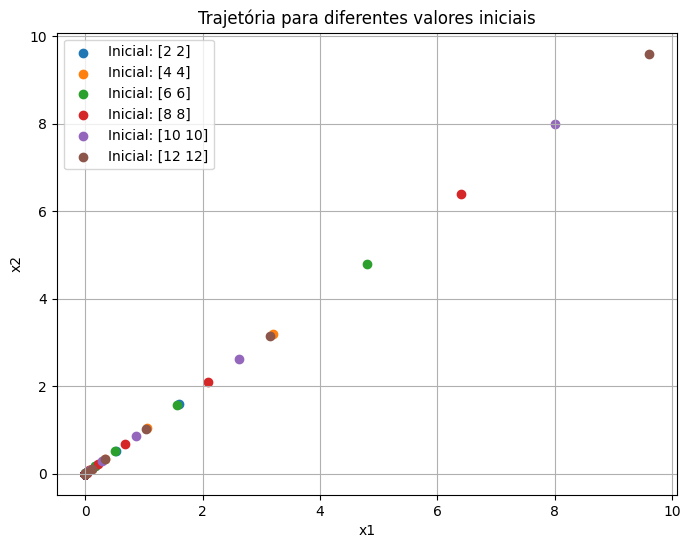

In [40]:
for i, valor_inicial in enumerate(valores_iniciais_variados):
    plt.scatter(
        valores_iter_vetor_x0[i][0],
        valores_iter_vetor_x0[i][1],
        label=f"Inicial: {valor_inicial}",
    )
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Trajetória para diferentes valores iniciais")
plt.legend()

Figura 14: Representação dos pontos por iteração no espaço da função $f(x_1, x_2)$ para diferentes valores de $x_0$.

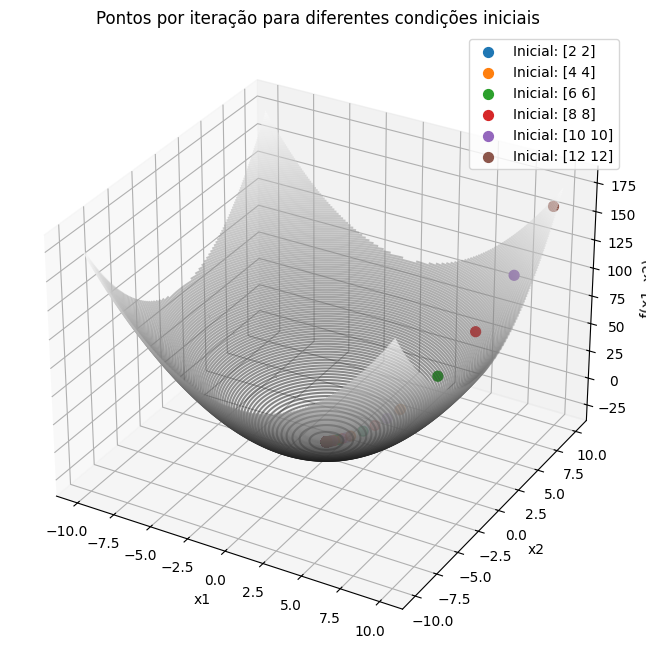

In [41]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

# Plotar a superfície da função
ax.contour3D(X1, X2, Z, 150, cmap="gray", alpha=0.5)

# Plotar os pontos para diferentes condições iniciais
for i, valores_iter in enumerate(valores_iter_vetor_x0):
    ax.scatter3D(
        valores_iter[0],
        valores_iter[1],
        f(valores_iter[0], valores_iter[1]),
        label=f"Inicial: {valores_iniciais_variados[i]}",
        s=50,
    )

ax.set_title("Pontos por iteração para diferentes condições iniciais")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1, x2)")
ax.legend()
plt.show()

Figura 15: Representação dos valores obtidos variando o parâmetro $x_0$ no algoritmo do gradiente descendente.

### Questão 3

#### 3 ) O termo de momento é utilizado em algoritmos do tipo gradiente descendente para controlar a convergência, deixando-o menos suscetível a oscilações. Para isso, é adicionado no algoritmo um termo: $\beta\Delta X_k$, onde $\beta$ é uma constante de ponderação e $\Delta X_k = x_k - x_{k-1}$. O termo de momento cria uma "memória" do passo da atualização anterior, tendendo a evitar as oscilações. Para o exemplo II, escolha um valor de taxa de aprendizagem $\alpha$ que produza oscilação no valor estimado da função a ser minimizada. Para essa configuração adicione no algoritmo o termo de momento e observe se é possível reduzir a oscilação.

In [ ]:
def gradiente_descendente_f_beta(valores_iniciais, num_iteracoes, alfa, beta):
    valores_iteracoes = []
    valores_atuais = valores_iniciais.copy()
    delta_anterior = np.zeros_like(valores_atuais)

    for i in range(0, num_iteracoes):
        grad_atual = grad_f(x=valores_atuais[0], y=valores_atuais[1])
        # Calcula o novo delta usando o termo de momento
        delta_atual = alfa * np.transpose(grad_atual) + beta * delta_anterior
        # Atualiza os valores
        valores_atuais = valores_atuais - delta_atual
        valores_iteracoes.append(valores_atuais.copy())
        delta_anterior = delta_atual

    return valores_iteracoes

Text(0.5, 1.0, 'Valores por iteração para α = 0.99 e β = 0')

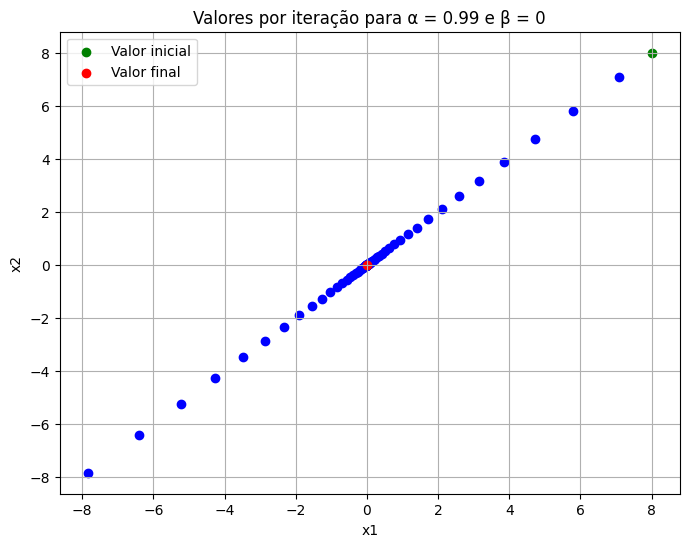

In [ ]:
valores_iter_beta0 = gradiente_descendente_f_beta(
    valores_iniciais, num_iteracoes, alfa=0.99, beta=0
)
# Pegar os valores por iteração em 5 em 5.
valores_iter_beta0 = np.array(valores_iter_beta0)
valores_iter_beta0 = valores_iter_beta0[::5]
valores_iter_beta0 = np.transpose(valores_iter_beta0)
plt.scatter(valores_iter_beta0[0], valores_iter_beta0[1], color="blue")
plt.scatter(
    valores_iniciais[0], valores_iniciais[1], color="green", label="Valor inicial"
)
plt.scatter(
    valores_iter_beta0[0][-1],
    valores_iter_beta0[1][-1],
    color="red",
    label="Valor final",
)
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Valores por iteração para α = 0.99 e β = 0")

Figura 16: O algoritmo do gradiente descendente oscila para $\alpha = 0,99$ e $x_o = [8;8]$.

Text(0.5, 1.0, 'Valores por iteração para α = 0.99 e β = 0.3')

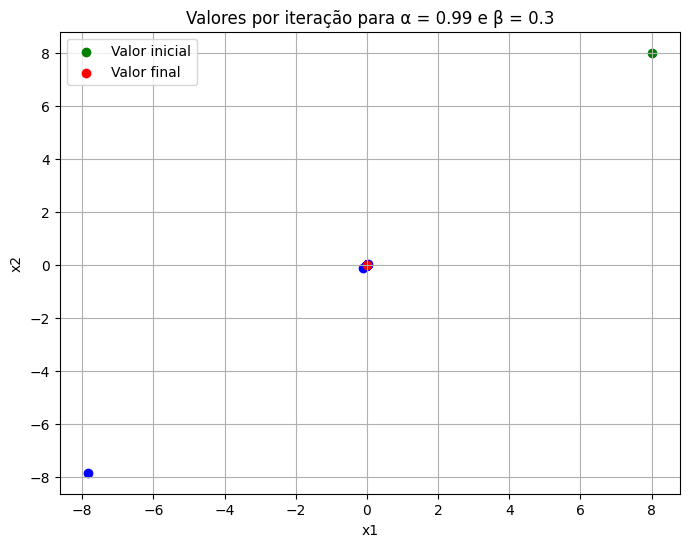

In [ ]:
valores_iter_beta0 = gradiente_descendente_f_beta(
    valores_iniciais, num_iteracoes, alfa=0.99, beta=0.3
)
# Pegar os valores por iteração em 5 em 5.
valores_iter_beta0 = np.array(valores_iter_beta0)
valores_iter_beta0 = valores_iter_beta0[::5]
valores_iter_beta0 = np.transpose(valores_iter_beta0)
plt.scatter(valores_iter_beta0[0], valores_iter_beta0[1], color="blue")
plt.scatter(
    valores_iniciais[0], valores_iniciais[1], color="green", label="Valor inicial"
)
plt.scatter(
    valores_iter_beta0[0][-1],
    valores_iter_beta0[1][-1],
    color="red",
    label="Valor final",
)
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Valores por iteração para α = 0.99 e β = 0.3")

Figura 17: Ao inserir um $\beta = 0,3$ no algoritmo do gradiente descendente para $\alpha = 0.99$ é possível reduzir significativamente a oscilação.